In [1]:
import os
from pathlib import Path
import json
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
from plot import *

In [2]:
# load data
dir = Path('/cristealab/xiwang/DSR1_Preprint/Outputs/scTab_10k/responses')
file_paths = [
    'scTab/sctab_10k_comparison_results.csv',
    'long_prompt_r1/100genes_scTabClassifier/results.csv',
    'short_prompt_r1/100genes_scTabClassifier/results.csv',
    'short_prompt_r1/100genes_scGPTClassifier/results.csv',
    'scGPT/scGPT_10k_comparison_results.csv',
    'short_prompt_r1/100genes/r1_100gene_10k_short_comparison_results.csv',
    'long_prompt_r1/100genes/r1_100gene_10k_long_comparison_results.csv',
    'long_prompt_v3/100genes_scTabClassifier/v3_100gene_classifier_longcomparison_results.csv',
    'short_prompt_v3/100genes_scTabClassifier/v3_100gene_classifier_shortcomparison_results.csv',
    'short_prompt_v3_0324/results.csv',
    'long_prompt_v3/100genes/v3_100gene_10k_long_comparison_results.csv',
    'short_prompt_v3/100genes/v3_100gene_10k_short_comparison_results.csv',
    
]

In [3]:
sctab, r1_long_sctab_cls, r1_sctab_cls, r1_scgpt_cls, scgpt, r1, r1_long,  \
    v3_long_cls,v3_cls, v3_new, v3_long, v3 = (pd.read_csv(dir/file) for file in file_paths)

In [4]:
accuracies = [float(df.iloc[-1,2]) for df in [sctab, r1_long_sctab_cls, r1_sctab_cls, r1_scgpt_cls, scgpt, r1, r1_long,  v3_long_cls,v3_cls, v3_new, v3_long, v3]]

In [5]:
models = ['scTab', 'R1 Long Reasoning (scTab Classifier)', 'R1 (scTab Classifier)', 'R1 (scGPT Classifier)', 'scGPT', 'R1', 'R1 Long Reasoning',  \
    'V3 Long Reasoning (scTab Classifier)','V3 (scTab Classifier)', 'V3-0324', 'V3 Long Reasoning', 'V3']

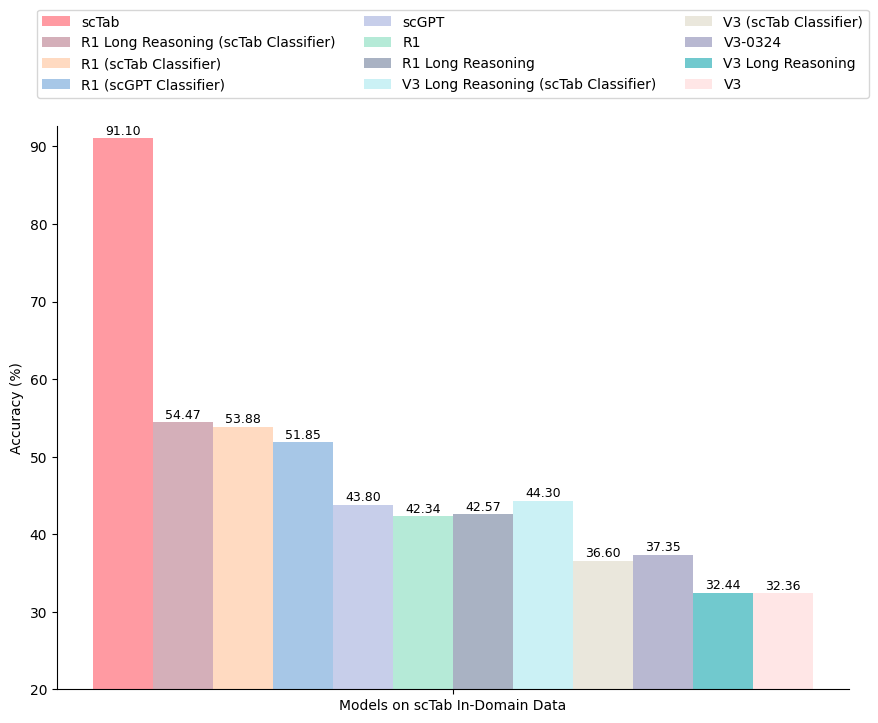

In [6]:
# figure 3B, models on in-domain scTab validation dataset

plotter = MetricPlotter(bar_width = 0.6, annotation_digits=2, 
                        y_lim_lower = 20, 
                        # y_lim_upper=100
                        )
plotter.display_axes_borders = 'xy'
plotter.figure_height = 8
plotter.group_gap = 0
plotter.text_margin = 0.001
plotter.colors = ['#FF9AA2', '#D4AFB9', '#FFDAC1' ,'#A7C7E7', '#C7CEEA','#B5EAD7','#A9B2C3', '#CBF1F5', '#EAE7DC', '#B8B8D1', '#71C9CE', '#FFE6E6', '#FFB6B9', '#A6E3E9',  '#C3CBD5']
plotter.group_barplot(['Models on scTab In-Domain Data'],models,metrics = np.array([np.array(accuracies)]).T, 
             x_label="", y_label="Accuracy", 
             # title="LLMs' Performance for Clusters"
             )

In [7]:
# cellxgene 8 datasets
file_paths_8d = [
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/scTab/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/scGPT/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_v3/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_8datasets_10k/responses/short_prompt_r1/100genes/results.csv'
]
file_paths_random = [
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/scTab/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/scGPT/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes_scGPTClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_v3/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes_scTabClassifier/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes/results.csv',
    '/cristealab/xiwang/DSR1_Preprint/Outputs/cellxgene_cutoff_random_10k/responses/short_prompt_r1/100genes_scGPTClassifier/results.csv',
]


In [8]:
# cellxgene random sampled data
sctab_8d, scgpt_8d, v3_8d, v3_scgpt_cls_8d, \
    v3_sctab_cls_8d, r1_scgpt_cls_8d, r1_sctab_cls_8d, r1_8d = (pd.read_csv(dir/file) for file in file_paths_8d)
# cellxgene random sampled data
sctab_random, scgpt_random,v3_sctab_cls_random , v3_scgpt_cls_random, \
    v3_random, r1_sctab_cls_random, r1_random, r1_scgpt_cls_random = (pd.read_csv(dir/file) for file in file_paths_random)

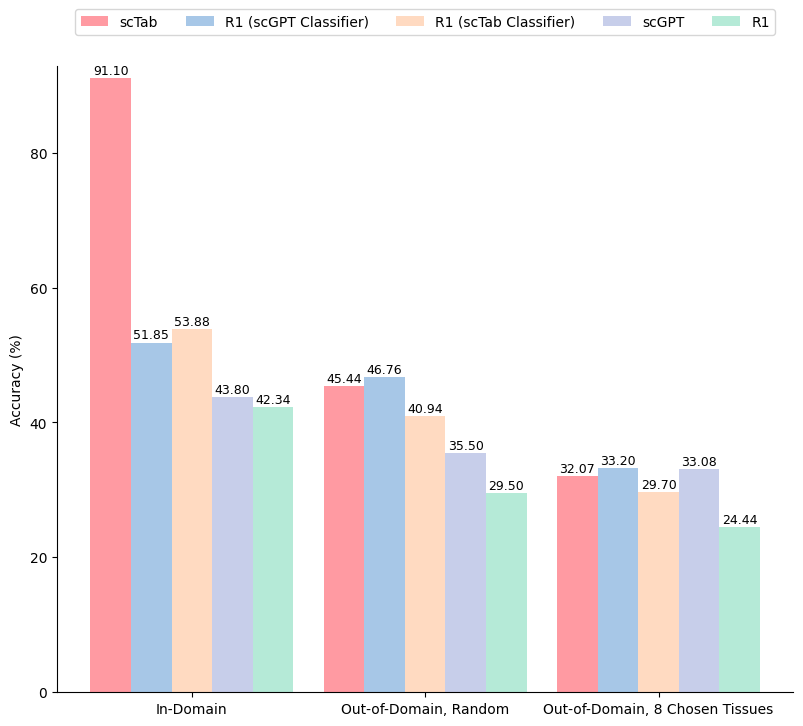

In [9]:
# figure 3A, plots for multiple datasets and models
accuracies = [
    [float(df.iloc[-1,2]) for df in [sctab, r1_scgpt_cls, r1_sctab_cls, scgpt, r1]],
    [float(df.iloc[-1,2]) for df in [sctab_random, r1_scgpt_cls_random, r1_sctab_cls_random, scgpt_random, r1_random]],
    [float(df.iloc[-1,2]) for df in [sctab_8d, r1_scgpt_cls_8d, r1_sctab_cls_8d, scgpt_8d, r1_8d]]
]

datasets = ['In-Domain', 'Out-of-Domain, Random', 'Out-of-Domain, 8 Chosen Tissues']
models = ['scTab', 'R1 (scGPT Classifier)', 'R1 (scTab Classifier)', 'scGPT', 'R1']

plotter = MetricPlotter(bar_width = 0.4, annotation_digits=2, 
                        y_lim_lower = 0, 
                        # y_lim_upper=100
                        )
plotter.figure_height = 8
plotter.display_axes_borders = 'xy'
plotter.group_gap = 0.3
plotter.text_margin = 0.001
plotter.ncol_legend = 5
plotter.colors = ['#FF9AA2','#A7C7E7','#FFDAC1','#C7CEEA','#B5EAD7',]
plotter.group_barplot(datasets,models,metrics = np.array(accuracies).T, 
             x_label="", y_label="Accuracy", 
             # title="LLMs' Performance for Clusters"
             )